In [3]:
!pip install sweetviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 60.1 MB/s eta 0:00:00:00:0100:01


id: Unique identifier for each patient (numerical).

age: Age of the patient in years (numerical).

dataset: Place of study or origin (categorical).
Cleveland
Hungary
Switzerland
VA Long Beach

sex: Gender of the patient (categorical: Male/Female).

cp: Chest pain type (categorical):
Typical angina
Atypical angina
Non-anginal pain
Asymptomatic
trestbps: Resting blood pressure (numerical, in mm Hg).

chol: Serum cholesterol level in mg/dl (numerical).

fbs: Fasting blood sugar > 120 mg/dl (Boolean: True/False).

restecg: Resting electrocardiographic results (categorical):

Normal
ST-T wave abnormality
Left ventricular hypertrophy
thalach: Maximum heart rate achieved during exercise (numerical).
exang: Exercise-induced angina (Boolean: True/False).

oldpeak: ST depression induced by exercise relative to rest (numerical).

slope: The slope of the peak exercise ST segment (categorical).

downsloping
flat
upsloping
ca: Number of major vessels colored by fluoroscopy (numerical, range 0-3).

thal: Thalassemia (categorical):

Normal
Fixed defect
Reversible defect
num: Predicted attribute (target variable, numerical).

In [9]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sweetviz as sv
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, classification_report, precision_score, f1_score

In [10]:
heart = pd.read_csv("/kaggle/input/heart-disease-data/heart_disease_uci.csv")
heart=heart.rename(columns={'num':'target', 'dataset':'origin','fbs':'fast_blood_sugar','cp':'chest_pain_type'})
print(heart.shape)


(920, 16)


                                             |          | [  0%]   00:00 -> (? left)


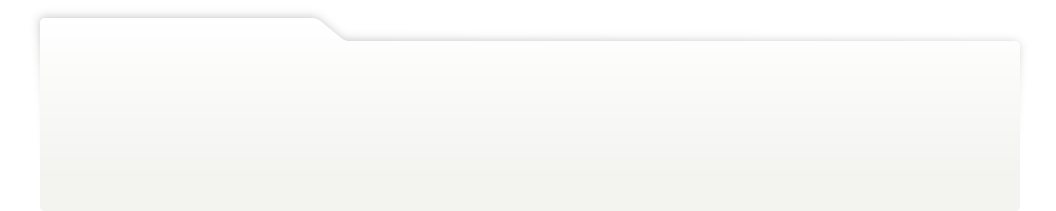
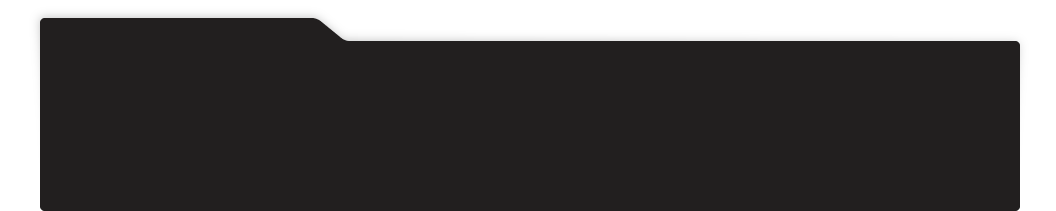
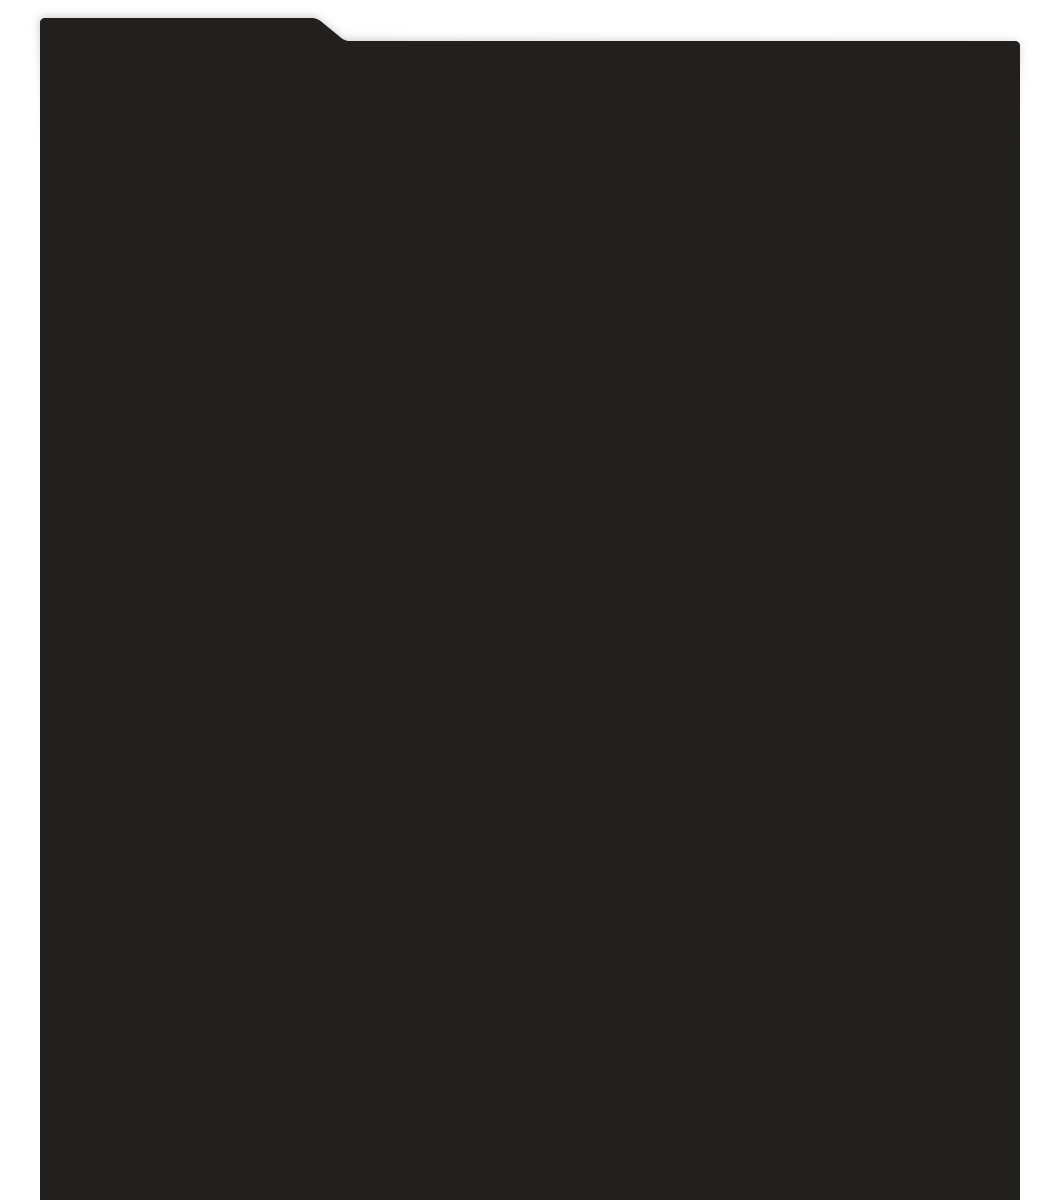
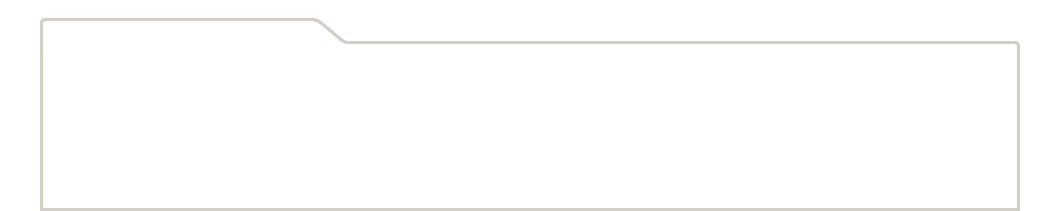
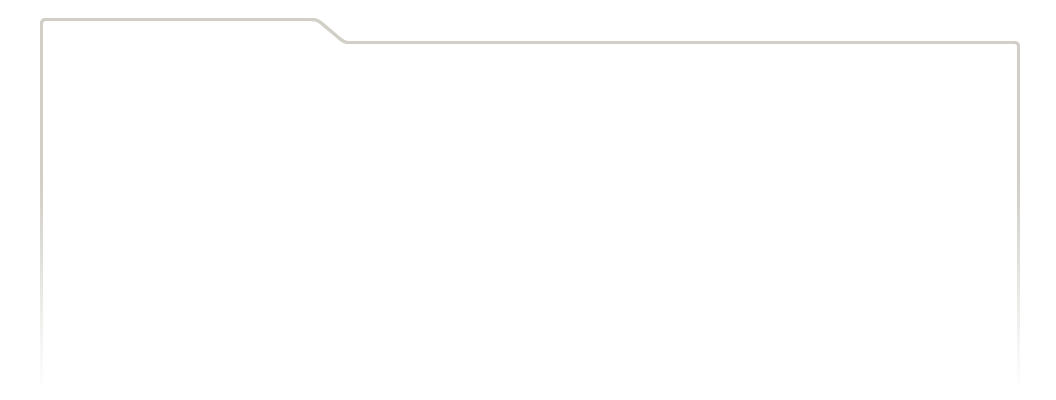
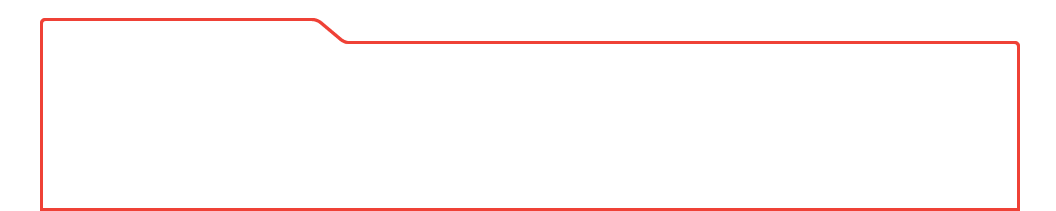
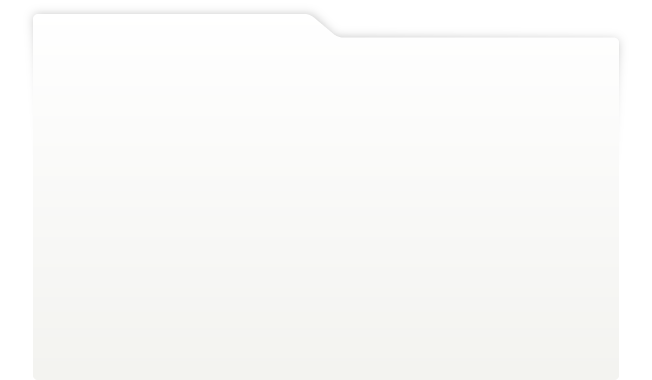
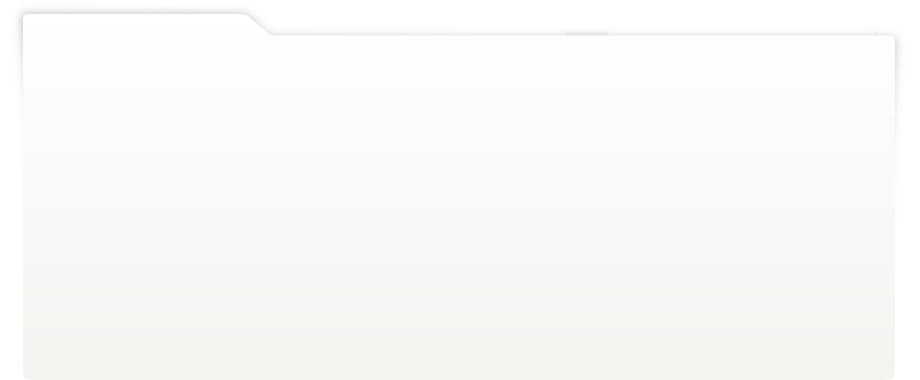
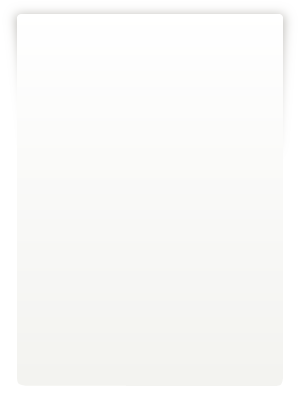
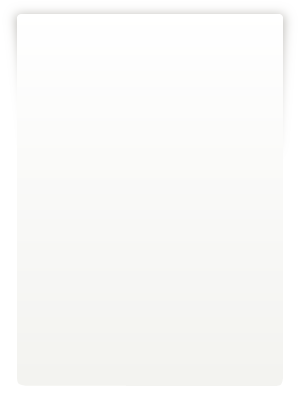
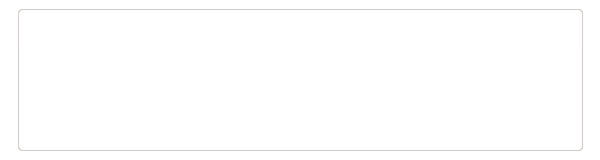
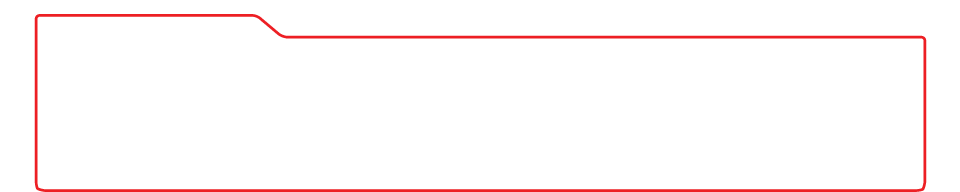
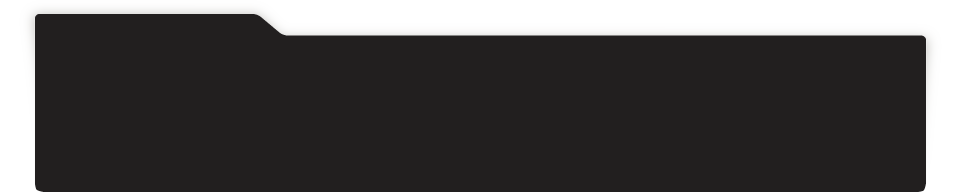
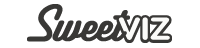
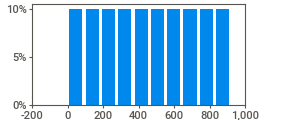
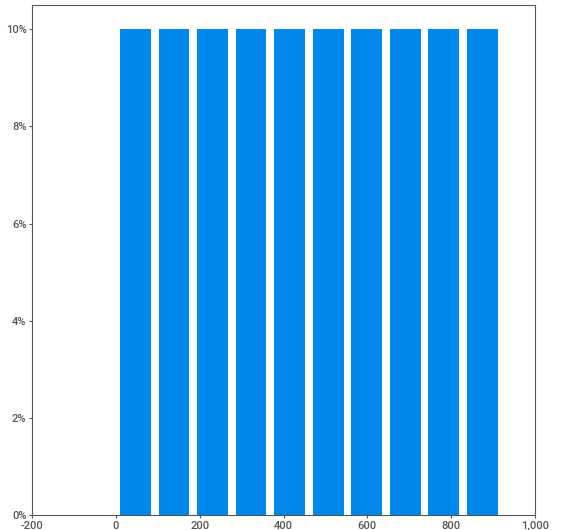
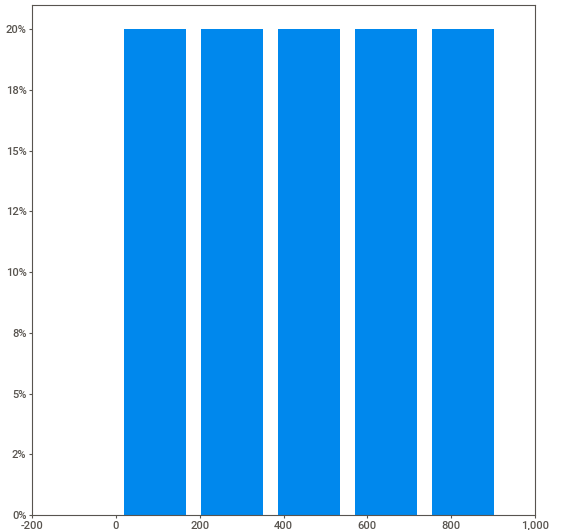
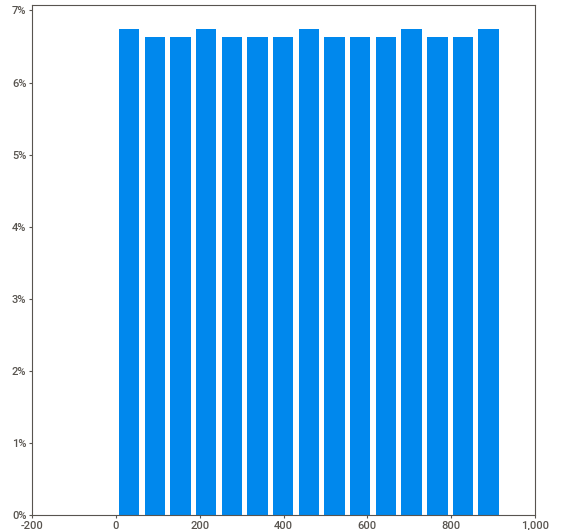
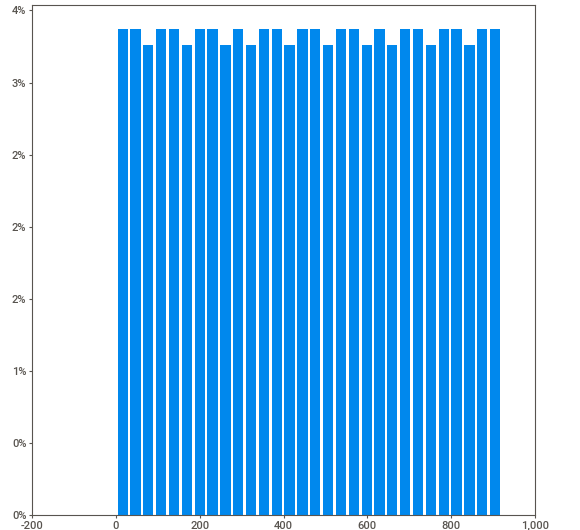
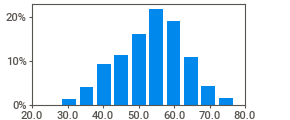
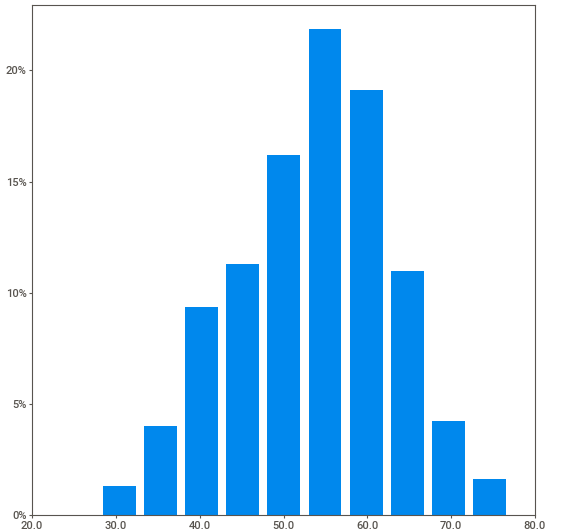
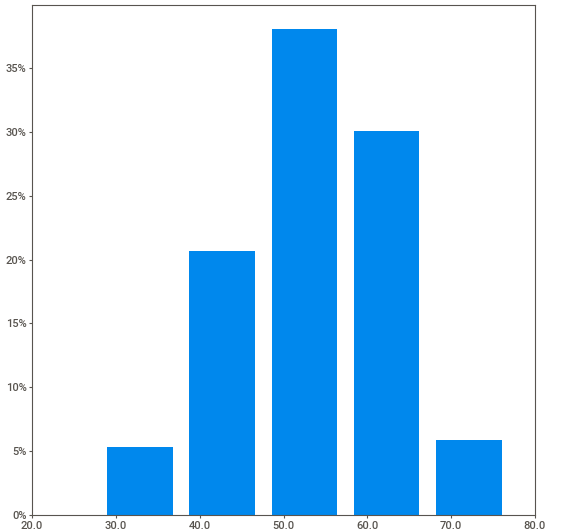
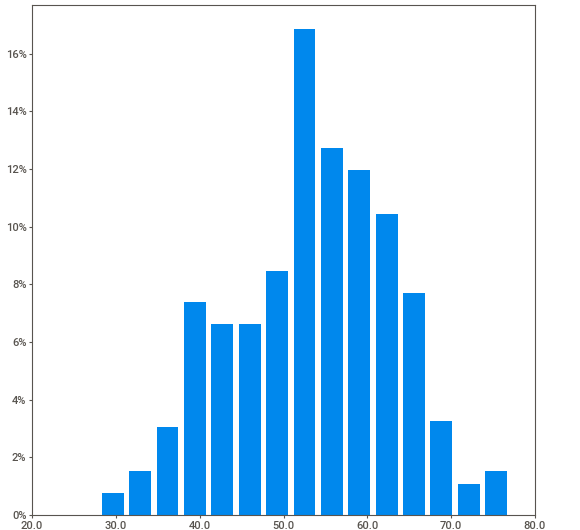
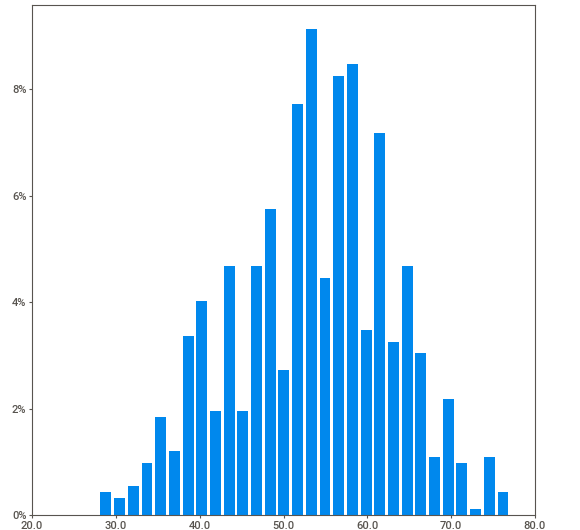
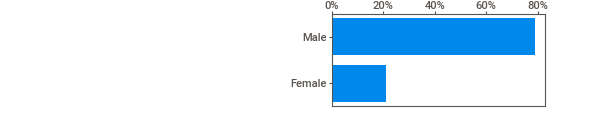
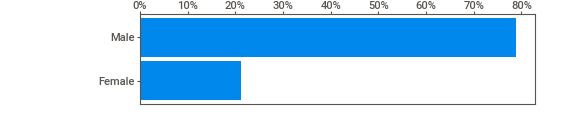
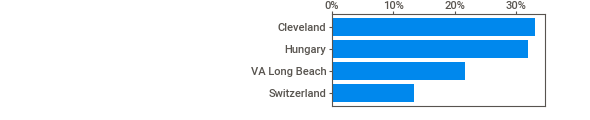
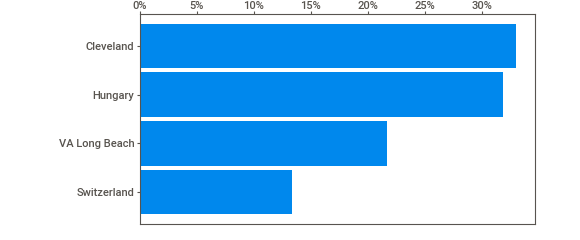
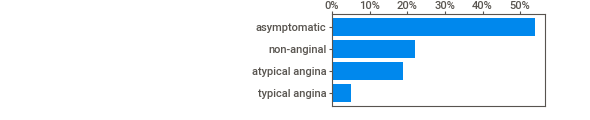
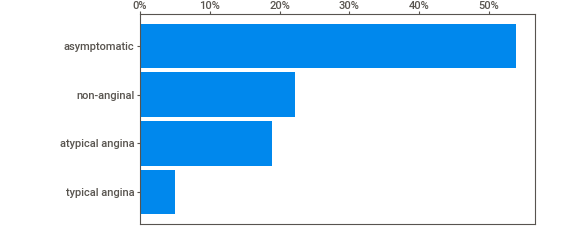
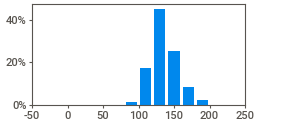
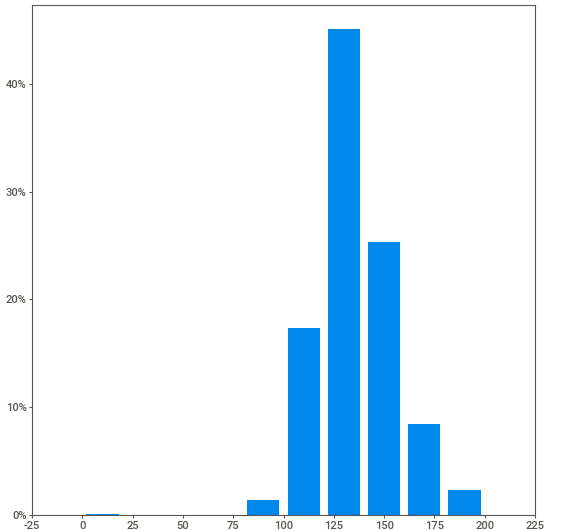
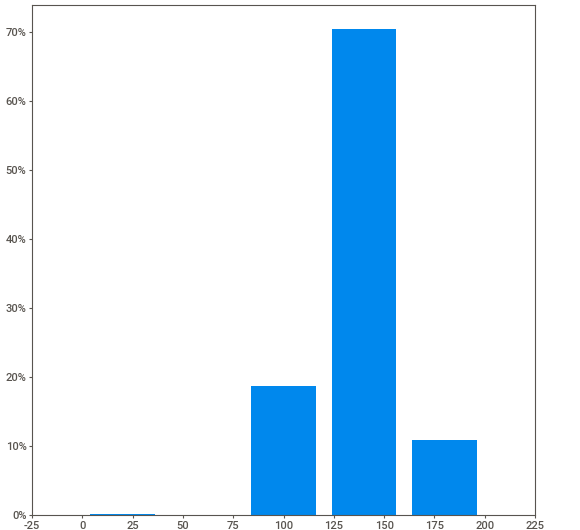
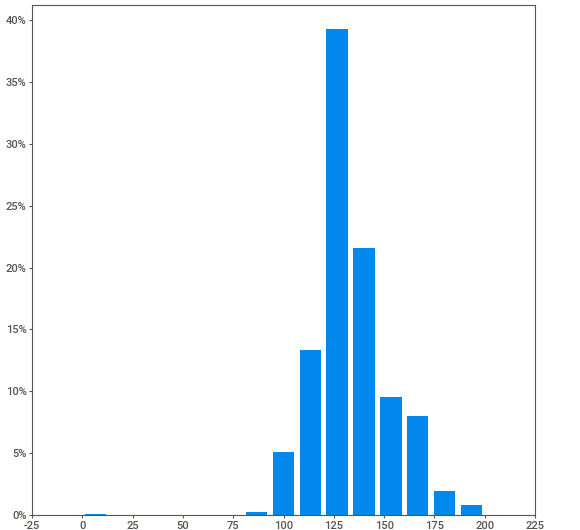
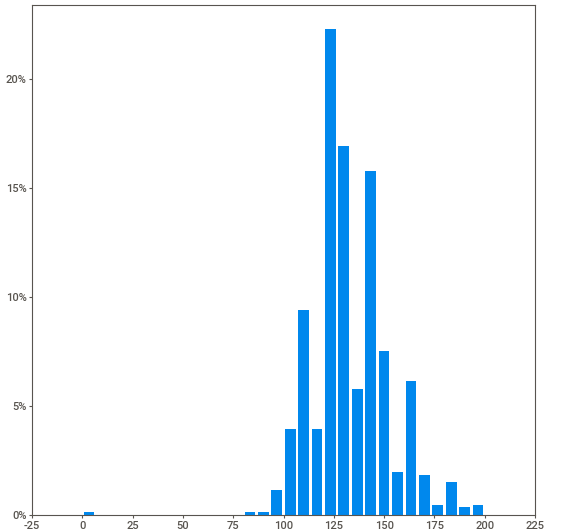
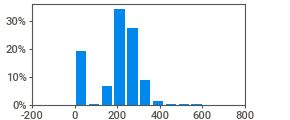
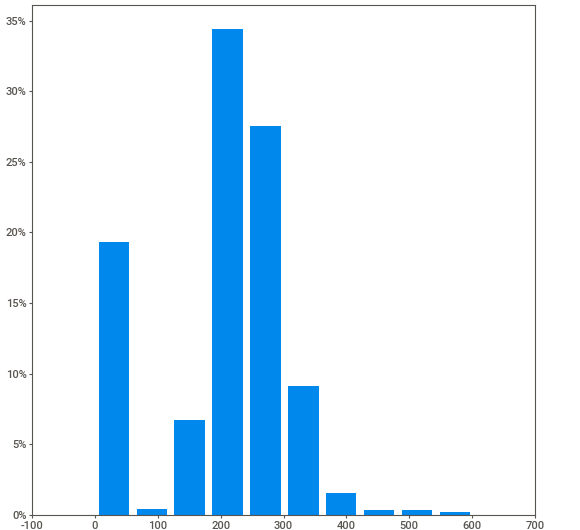
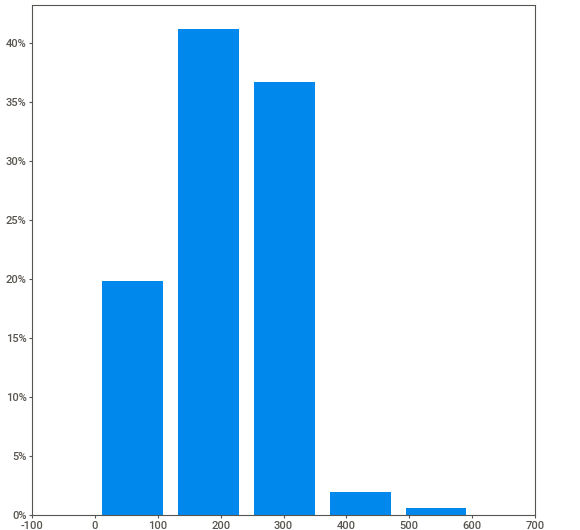
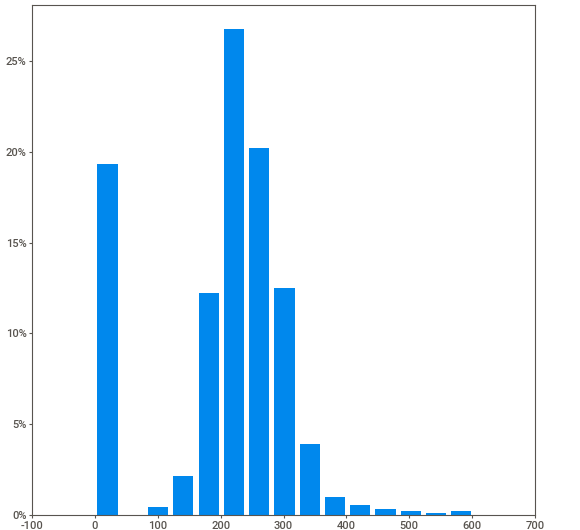
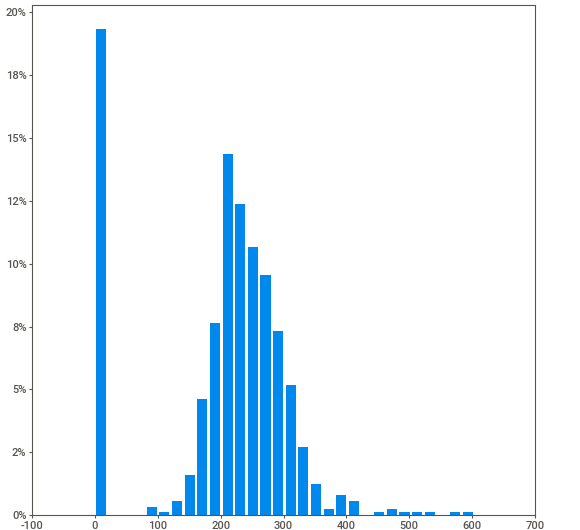
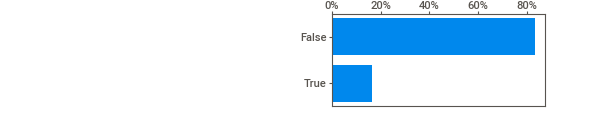
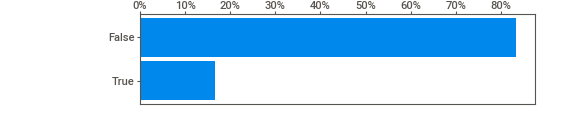
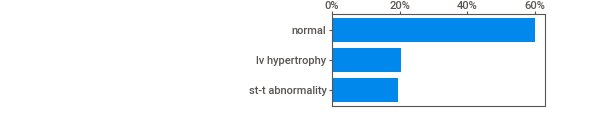
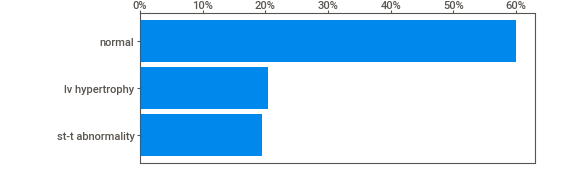
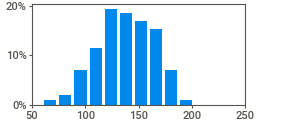
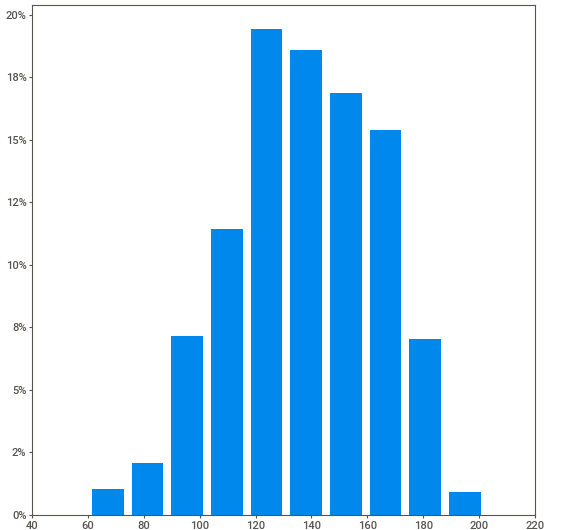
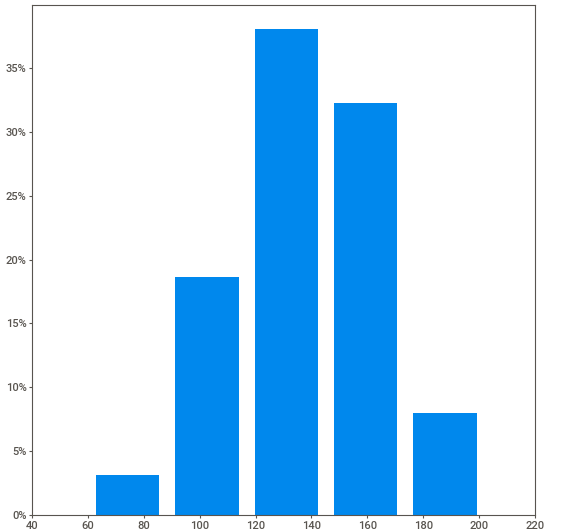
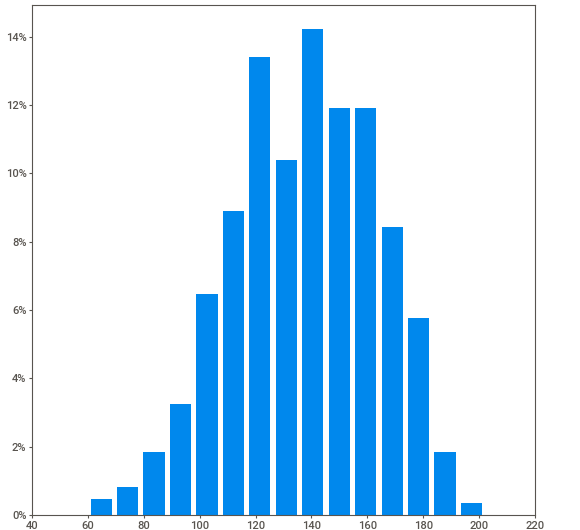
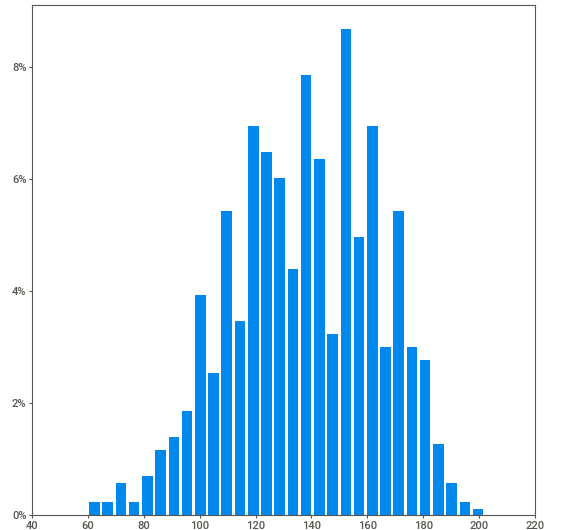
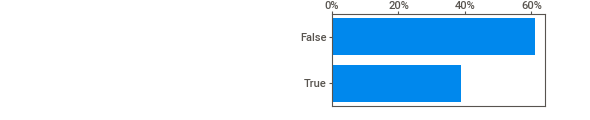
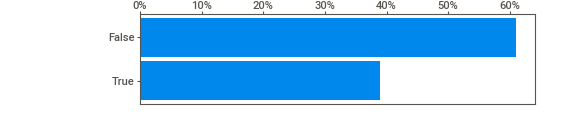
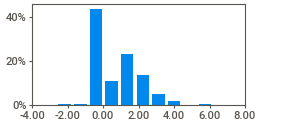
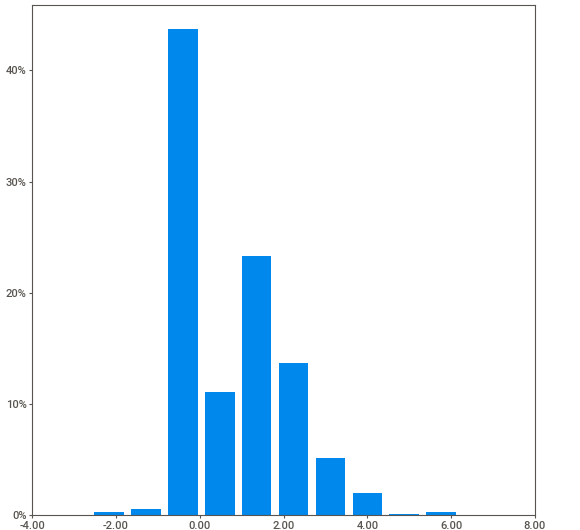
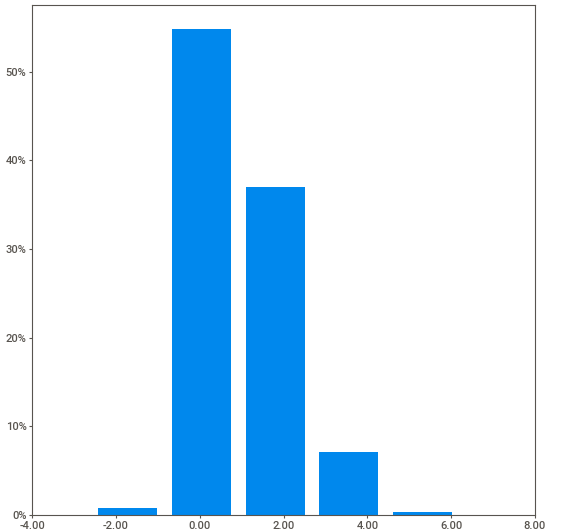
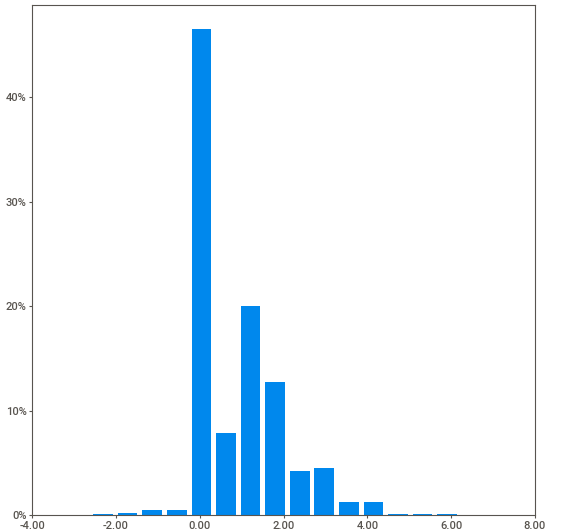
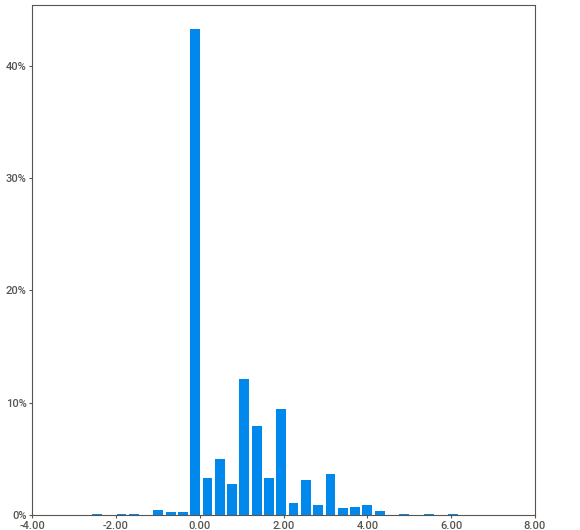
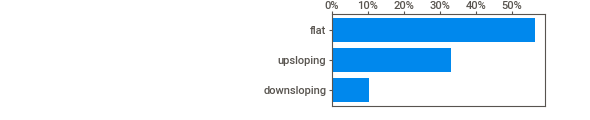
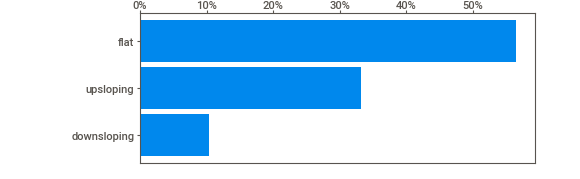
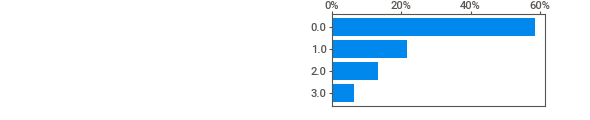
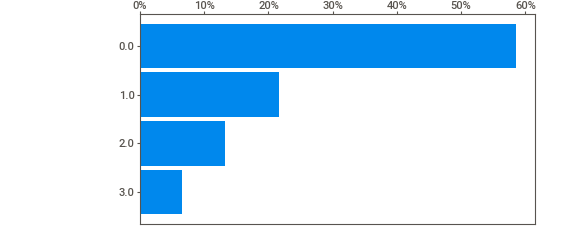
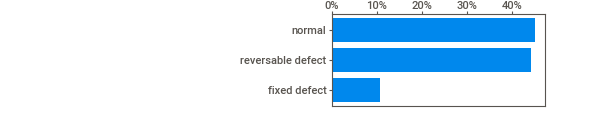
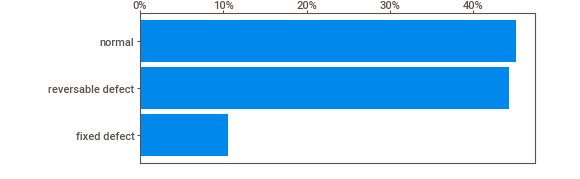
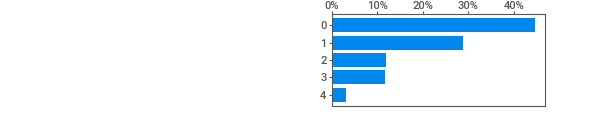
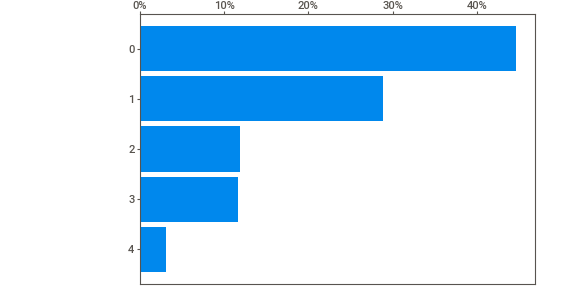
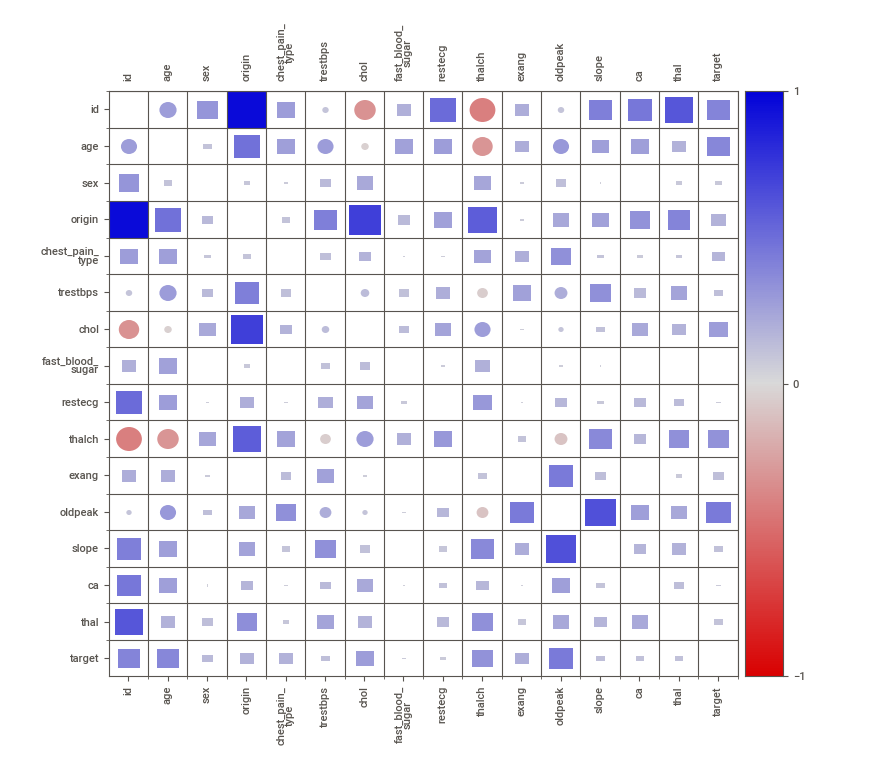
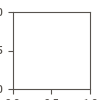

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                920 non-null    int64  
 1   age               920 non-null    int64  
 2   sex               920 non-null    object 
 3   origin            920 non-null    object 
 4   chest_pain_type   920 non-null    object 
 5   trestbps          861 non-null    float64
 6   chol              890 non-null    float64
 7   fast_blood_sugar  830 non-null    object 
 8   restecg           918 non-null    object 
 9   thalch            865 non-null    float64
 10  exang             865 non-null    object 
 11  oldpeak           858 non-null    float64
 12  slope             611 non-null    object 
 13  ca                309 non-null    float64
 14  thal              434 non-null    object 
 15  target            920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory us

In [12]:
df_eda = sv.analyze(heart)
df_eda.show_notebook()

heart.info()

**Deal with duplicates nd missing values**

In [13]:
# Set the option to opt into the future behavior
pd.set_option('future.no_silent_downcasting', True)

duplicates = heart[heart.duplicated()] #no duplicate #identify duplicate rows
print(duplicates)

# Check missing values
print("Percentage of missing values in each column:")
print(round(heart.isnull().sum() * 100 / len(heart), 2))

# Identify categorical, numerical, and boolean columns
categorical_cols = heart.select_dtypes(include=['object', 'category']).columns
numerical_cols = heart.select_dtypes(include=['number']).columns
boolean_cols = heart.select_dtypes(include=['bool']).columns

print("Categorical columns:", categorical_cols)
print("Numerical columns:", numerical_cols)
print("Boolean columns:", boolean_cols)

# Fill missing values in categorical columns with mode
for col in categorical_cols:
    if heart[col].isnull().sum() > 0:  
        mode = heart[col].mode()[0]  
        heart[col] = heart[col].fillna(mode)

# Fill missing values in numerical columns with mean
for col in numerical_cols:
    if heart[col].isnull().sum() > 0:  
        mean = heart[col].mean()  
        heart[col] = heart[col].fillna(mean)

# Fill missing values in boolean columns with mode
for col in boolean_cols:
    if heart[col].isnull().sum() > 0:  
        mode = heart[col].mode()[0]  
        heart[col] = heart[col].fillna(mode)

# Display missing values in a styled DataFrame
styled_missing = pd.DataFrame(heart.isnull().sum(), columns=['Missing Values']).T.style.background_gradient(cmap='Blues')
display(styled_missing)

Empty DataFrame
Columns: [id, age, sex, origin, chest_pain_type, trestbps, chol, fast_blood_sugar, restecg, thalch, exang, oldpeak, slope, ca, thal, target]
Index: []
Percentage of missing values in each column:
id                   0.00
age                  0.00
sex                  0.00
origin               0.00
chest_pain_type      0.00
trestbps             6.41
chol                 3.26
fast_blood_sugar     9.78
restecg              0.22
thalch               5.98
exang                5.98
oldpeak              6.74
slope               33.59
ca                  66.41
thal                52.83
target               0.00
dtype: float64
Categorical columns: Index(['sex', 'origin', 'chest_pain_type', 'fast_blood_sugar', 'restecg',
       'exang', 'slope', 'thal'],
      dtype='object')
Numerical columns: Index(['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'target'], dtype='object')
Boolean columns: Index([], dtype='object')


,id,age,sex,origin,chest_pain_type,trestbps,chol,fast_blood_sugar,restecg,thalch,exang,oldpeak,slope,ca,thal,target
Missing Values,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**Deals With Catogorial and boolean Data (using label encoding method)**

In [14]:
#write me code to label boolen cols,  values as 1 for true and 0 for false, also for sex col write 0 for male and 1 female , 
# Initialize an empty dictionary to store the count of unique categories
unique_categories = {}

# Iterate over each categorical column to find the number of unique categories
for col in categorical_cols:
    unique_values = heart[col].unique()
    unique_count = len(unique_values)
    unique_categories[col] = unique_count

# Convert the dictionary to a DataFrame for better visualization
unique_categories_df = pd.DataFrame(list(unique_categories.items()), columns=['Column', 'Unique Categories'])

print(unique_categories_df)

boolean_cols = ['fast_blood_sugar', 'exang'] 
#converting boolean to int
for col in boolean_cols:
    heart[col] = heart[col].astype(int)
    
# Encode 'sex' column: 0 for male and 1 for female
heart['sex'] = heart['sex'].map({'Male': 0, 'Female': 1})

# Columns to be label encoded
columns_to_encode = ['origin', 'chest_pain_type', 'restecg', 'slope', 'thal']

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to each column
for col in columns_to_encode:
    heart[col] = label_encoder.fit_transform(heart[col])

#verify
print(heart.head())
print(heart.info())


             Column  Unique Categories
0               sex                  2
1            origin                  4
2   chest_pain_type                  4
3  fast_blood_sugar                  2
4           restecg                  3
5             exang                  2
6             slope                  3
7              thal                  3
   id  age  sex  origin  chest_pain_type  trestbps   chol  fast_blood_sugar  \
0   1   63    0       0                3     145.0  233.0                 1   
1   2   67    0       0                0     160.0  286.0                 0   
2   3   67    0       0                0     120.0  229.0                 0   
3   4   37    0       0                2     130.0  250.0                 0   
4   5   41    1       0                1     130.0  204.0                 0   

   restecg  thalch  exang  oldpeak  slope   ca  thal  target  
0        0   150.0      0      2.3      0  0.0     0       0  
1        0   108.0      1      1.5      1  3.0  

**Dealing With Outliers**

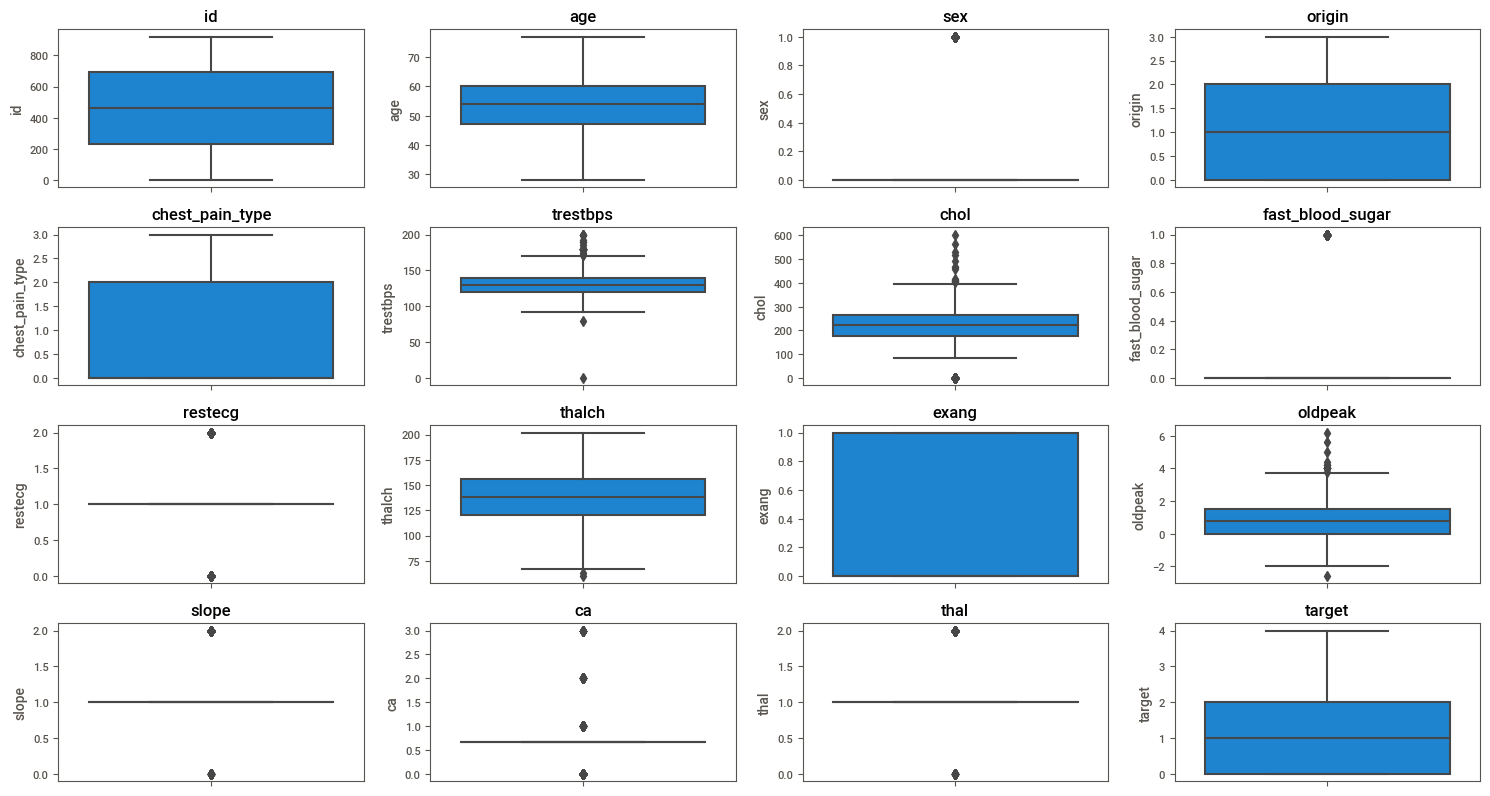

In [15]:
# Draw box plots for each numerical column
numerical_cols = heart.select_dtypes(include=['number']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(5, 4, i)  # Adjust subplot configuration as needed
    sns.boxplot(y=heart[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# Columns with potential outliers
columns_with_outliers = ['trestbps', 'chol', 'oldpeak']

# Function to remove outliers using the IQR method
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_out = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df_out

# Apply the function to each of the specified columns
for col in columns_with_outliers:
    heart = remove_outliers(heart, col)


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Separate features and target
X = heart.drop(columns='target')
y = heart['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train and evaluate Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg, average='weighted')
recall_log_reg = recall_score(y_test, y_pred_log_reg, average='weighted')
f1_log_reg = f1_score(y_test, y_pred_log_reg, average='weighted')

print("Logistic Regression Performance:")
print(f"Accuracy: {accuracy_log_reg:.4f}")
print(f"Precision: {precision_log_reg:.4f}")
print(f"Recall: {recall_log_reg:.4f}")
print(f"F1-score: {f1_log_reg:.4f}\n")

# Feature Selection using Recursive Feature Elimination (RFE)
rfe = RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=10)
rfe.fit(X_train, y_train)
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# Train and evaluate Logistic Regression with RFE
log_reg_rfe = LogisticRegression(max_iter=1000)
log_reg_rfe.fit(X_train_rfe, y_train)
y_pred_log_reg_rfe = log_reg_rfe.predict(X_test_rfe)
accuracy_log_reg_rfe = accuracy_score(y_test, y_pred_log_reg_rfe)
precision_log_reg_rfe = precision_score(y_test, y_pred_log_reg_rfe, average='weighted')
recall_log_reg_rfe = recall_score(y_test, y_pred_log_reg_rfe, average='weighted')
f1_log_reg_rfe = f1_score(y_test, y_pred_log_reg_rfe, average='weighted')

print("Logistic Regression Performance with RFE:")
print(f"Accuracy: {accuracy_log_reg_rfe:.4f}")
print(f"Precision: {precision_log_reg_rfe:.4f}")
print(f"Recall: {recall_log_reg_rfe:.4f}")
print(f"F1-score: {f1_log_reg_rfe:.4f}\n")


# Feature Selection using Correlation-based Filter Method
correlation_matrix = heart.corr()
threshold = 0.25
mask = np.abs(correlation_matrix["target"]) > threshold
selected_features = heart.columns[mask].tolist()
print (selected_features)
X_filtered = heart[selected_features].drop(columns='target')
y_filtered = heart['target']

# Split the filtered data into training and testing sets
X_train_filtered, X_test_filtered, y_train_filtered, y_test_filtered = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)
X_train_filtered = scaler.fit_transform(X_train_filtered)
X_test_filtered = scaler.transform(X_test_filtered)

# Train and evaluate Logistic Regression with Correlation-based Feature Selection
log_reg_filtered = LogisticRegression(max_iter=1000)
log_reg_filtered.fit(X_train_filtered, y_train_filtered)
y_pred_log_reg_filtered = log_reg_filtered.predict(X_test_filtered)
accuracy_log_reg_filtered = accuracy_score(y_test_filtered, y_pred_log_reg_filtered)
precision_log_reg_filtered = precision_score(y_test_filtered, y_pred_log_reg_filtered, average='weighted')
recall_log_reg_filtered = recall_score(y_test_filtered, y_pred_log_reg_filtered, average='weighted')
f1_log_reg_filtered = f1_score(y_test_filtered, y_pred_log_reg_filtered, average='weighted')

print("Logistic Regression Performance with Correlation-based Feature Selection:")
print(f"Accuracy: {accuracy_log_reg_filtered:.4f}")
print(f"Precision: {precision_log_reg_filtered:.4f}")
print(f"Recall: {recall_log_reg_filtered:.4f}")
print(f"F1-score: {f1_log_reg_filtered:.4f}\n")

Logistic Regression Performance:
Accuracy: 0.7163
Precision: 0.6701
Recall: 0.7163
F1-score: 0.6901

Logistic Regression Performance with RFE:
Accuracy: 0.6950
Precision: 0.6396
Recall: 0.6950
F1-score: 0.6623

['age', 'sex', 'chest_pain_type', 'thalch', 'exang', 'oldpeak', 'ca', 'target']
Logistic Regression Performance with Correlation-based Feature Selection:
Accuracy: 0.6667
Precision: 0.6134
Recall: 0.6667
F1-score: 0.6332



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Comparision

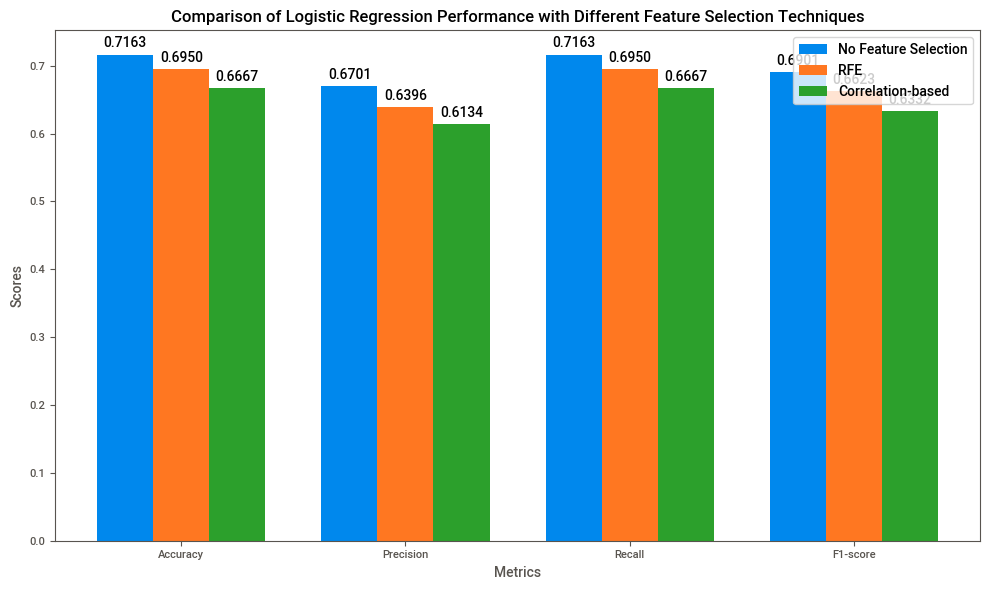

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Performance metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
no_selection = [0.7163, 0.6701, 0.7163, 0.6901]
rfe_selection = [0.6950, 0.6396, 0.6950, 0.6623]
corr_selection = [0.6667, 0.6134, 0.6667, 0.6332]

# Create bar chart
x = np.arange(len(metrics))  # Label locations
width = 0.25  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, no_selection, width, label='No Feature Selection')
rects2 = ax.bar(x, rfe_selection, width, label='RFE')
rects3 = ax.bar(x + width, corr_selection, width, label='Correlation-based')

# Add labels, title, and custom x-axis tick labels
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Logistic Regression Performance with Different Feature Selection Techniques')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Add data labels
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.4f}', 
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # Offset text vertically
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)
add_labels(rects3)

fig.tight_layout()
plt.show()
